In [ ]:
import Bio.SeqIO as IO
from tqdm.auto import tqdm
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Read and sort the data wih the number of proteins and their overall lengths per method/species
stats2=pd.read_csv('ProtLengthStats_canonical_4methods_2.csv')
print(stats2)
from pandas.api.types import CategoricalDtype


corr=pd.DataFrame({'Code': ['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 
                            'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   'Especies': ['C. intestinalis (vase tunicate)', 'L. oculatus (spotted gar)', 'D. rerio (zebrafish)', 
              'S. trutta (brown trout)','G. morhua (Atlantic cod)', 'O. latipes (medaka fish)', 'E. naucrates (live sharksucker)',
              'E. calabaricus (reedfish)', 'X. tropicalis (western clawed frog)', 'C. p. bellii (painted turtle)',
              'G. gallus (chicken)', 'S. habroptila (kakapo)', 'T. guttata (zebra finch)', 
              'P. muralis (wall lizard)','O. anatinus (platypus)', 'S. harrisii (tasmanian devil)', 
              'H. sapiens (human)', 'M. musculus (house mouse)', 'F. catus (domestic cat)', 'P. sinus (vaquita)']})


stats2['Species']= stats2['Species'].map(corr.set_index('Especies')['Code'])

speciesorder = CategoricalDtype(['CIOIN','ERCAL', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ECNAU','ORYLA', 
                                 'XENTR','PODMU', 'CHPIB','CHICK','TAEGU', 'KAKAP',   
                                  'ORANA', 'SARHA', 'PHOSI','FELCA', 'MOUSE','HUMAN'], ordered=True)
stats2['Species'] = stats2['Species'].astype(speciesorder)
stats2=stats2.sort_values('Species')

stats2['Method'] = stats2['Method'].replace('Reference proteomes\n UniProt', 'Reference proteomes UniProt')
methodorder=CategoricalDtype(['Ab-initio','Reference proteomes UniProt', 'NCBI', 'Ensembl'])
stats2['Method']=stats2['Method'].astype(methodorder)
stats2=stats2.sort_values('Method')



                           Method                          Species    count  \
0                       Ab-initio  C. intestinalis (vase tunicate)  13196.0   
1                       Ab-initio        E. calabaricus (reedfish)  78579.0   
2                       Ab-initio        L. oculatus (spotted gar)  36227.0   
3                       Ab-initio             D. rerio (zebrafish)  23288.0   
4                       Ab-initio          S. trutta (brown trout)  51185.0   
..                            ...                              ...      ...   
75  Reference proteomes\n UniProt    S. harrisii (tasmanian devil)  19171.0   
76  Reference proteomes\n UniProt               P. sinus (vaquita)  18892.0   
77  Reference proteomes\n UniProt          F. catus (domestic cat)  19652.0   
78  Reference proteomes\n UniProt        M. musculus (house mouse)  21984.0   
79  Reference proteomes\n UniProt               H. sapiens (human)  20598.0   

          mean         std   min     25%    50%    

In [5]:
pd.set_option('display.max_rows', None)
#stats2

## Count orthologs

In [10]:
## Orthologs counting

path1='pathto/directory/withOMAfolders'
metfol =['Augustus', 'UniProt', 'topNCBI', 'topEnsembl']
path2='/Output/PairwiseOrthologs/'

codes=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI']


import os
from collections import defaultdict

# Initialize 'Orthologs' and 'Total_relationships' columns with default values
stats2['Orthologs'] = 0
stats2['Total_relationships'] = 0

relstotals = []
ortotals = []
spe=[]
metodo=[]


for mf in metfol:

    orthologs=defaultdict(lambda: defaultdict(int))
    fns = os.listdir(path1+mf+path2)
    
    for fn in fns:
        z = fn.split('.')[0].split('-')
        if len(z) == 2:
            (sp1, sp2) = z
        else:
            # not pairwise file
            continue
        f=open(path1+mf+path2+fn,'r')
        lines= f.readlines()[4:]
        for l in lines:
            gene1= l.split('\t')[2].split()[0]
            gene2= l.split('\t')[3].split()[0]
            orthologs[sp1][gene1]+=1
            orthologs[sp2][gene2]+=1
        
    for c in codes:
        ortotal=len(orthologs[c])
        relstotal=sum(list(orthologs[c].values()))
        relsavg=relstotal/relstotal

        ortotals.append(ortotal)
        relstotals.append(relstotal)
        spe.append(c)
        metodo.append(mf)
        
ortholognumbers=pd.DataFrame({'Method': metodo, 'Species': spe, 'Orthologues_total': ortotals, 'Relationships_total': relstotals})

The output of the code above:

In [80]:
#ortholognumbers.to_csv('Ortholog_numbers.csv')
ortholognumbers=pd.read_csv('Ortholog_numbers.csv')

In [81]:
ortholognumbers=ortholognumbers.drop(columns='Unnamed: 0')

In [19]:
stats2.groupby('Method')['count'].sum()

Method
Ab-initio                        645378.0
Reference proteomes\n UniProt    428196.0
NCBI                             426843.0
Ensembl                          436713.0
Name: count, dtype: float64

In [10]:
#statsmerge = stats2.merge(ortholognumbers)

In [13]:
#statsmerge

,Species,Method,count,mean,std,min,25%,50%,75%,max,Orthologues_total,Relationships_total,Orthologs_norm,Relats_perOrth,Relats_perGene
0,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.0,418.0,717.0,33420.0,6547,100538,0.496135,15.356346,7.618824
1,CIOIN,Reference proteomes UniProt,16680.0,322.028777,347.341120,21.0,144.0,236.0,415.0,21338.0,7452,178245,0.446763,23.919082,10.686151
2,CIOIN,NCBI,13627.0,512.347912,520.487474,35.0,245.0,393.0,616.0,26404.0,8254,247412,0.605709,29.974800,18.156014
3,CIOIN,Ensembl,16671.0,321.240957,346.229801,21.0,144.0,236.0,414.0,21338.0,7467,185286,0.447904,24.813982,11.114270
4,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.0,226.0,429.0,22541.0,15308,179561,0.422558,11.729880,4.956552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,FELCA,Reference proteomes UniProt,19652.0,563.930389,554.057233,13.0,264.0,423.0,690.0,27108.0,18385,384469,0.935528,20.912102,19.563861
76,PHOSI,Reference proteomes UniProt,18892.0,536.783242,509.399713,24.0,230.0,405.0,662.0,8798.0,17725,299045,0.938228,16.871368,15.829187
77,PHOSI,NCBI,19069.0,563.881535,583.314773,35.0,259.0,421.0,683.0,34346.0,18288,545257,0.959043,29.815015,28.593896
78,PHOSI,Ensembl,18962.0,522.826179,495.894731,24.0,224.0,395.0,643.0,8798.0,17901,322722,0.944046,18.028155,17.019407


In [19]:
#statsmerge['Orthologs_norm']=statsmerge['Orthologues_total']/statsmerge['count']
#statsmerge['Relats_perOrth']=statsmerge['Relationships_total']/statsmerge['Orthologues_total']
#statsmerge['Relats_perGene']=statsmerge['Relationships_total']/statsmerge['count']

We provide the precomputed table, but you can re generate it by uncommenting the code above

In [4]:
#statsmerge.to_csv('Statsmerge.csv')
statsmerge=pd.read_csv('Statsmerge.csv')
statsmerge=statsmerge.drop(columns='Unnamed: 0')

In [5]:
statstolength=pd.DataFrame()
statstolength['Species']=statsmerge['Species']
statstolength['Method']=statsmerge['Method']
statstolength['Prop_orth']=statsmerge['Orthologs_norm']

In [6]:
statstolength['Method'] = statstolength['Method'].replace('Reference proteomes UniProt', 'UniProt')

In [7]:
result=pd.read_csv('resultmedian.csv')

In [8]:
corr=pd.DataFrame({'Code': ['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 
                            'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   'Especies': ['C. intestinalis (vase tunicate)', 'L. oculatus (spotted gar)', 'D. rerio (zebrafish)', 
              'S. trutta (brown trout)','G. morhua (Atlantic cod)', 'O. latipes (medaka fish)', 'E. naucrates (live sharksucker)',
              'E. calabaricus (reedfish)', 'X. tropicalis (western clawed frog)', 'C. p. bellii (painted turtle)',
              'G. gallus (chicken)', 'S. habroptila (kakapo)', 'T. guttata (zebra finch)', 
              'P. muralis (wall lizard)','O. anatinus (platypus)', 'S. harrisii (tasmanian devil)', 
              'H. sapiens (human)', 'M. musculus (house mouse)', 'F. catus (domestic cat)', 'P. sinus (vaquita)']})

In [9]:
statstolength['Species']= statstolength['Species'].map(corr.set_index('Code')['Especies'])

In [88]:
merged_df = pd.merge(statstolength, result, on=['Method', 'Species'])

In [71]:
corr = sp.stats.pearsonr(x=merged_df['50%'], y=merged_df['Prop_orth'])

In [34]:
corr

PearsonRResult(statistic=0.8851521954282561, pvalue=1.2282609555053772e-27)

In [10]:
stats2.groupby(['Method']).describe()

count                                             \
                            count      mean           std      min       25%   
Method                                                                         
Ab-initio                    20.0  32268.90  20717.213252  13196.0  19258.25   
Reference proteomes UniProt  20.0  21409.80   5769.453168  16021.0  18268.75   
NCBI                         20.0  21342.15   5840.170287  13627.0  18638.00   
Ensembl                      20.0  21835.65   6217.895102  16037.0  18110.25   

                                                         mean              \
                                 50%       75%      max count        mean   
Method                                                                      
Ab-initio                    23451.5  36897.50  91991.0  20.0  479.833911   
Reference proteomes UniProt  20881.0  22126.75  43230.0  20.0  541.002647   
NCBI                         20698.5  21962.25  42405.0  20.0  570.418693   
Ensembl                      21420.5  22999.00  43935.0  20.0  523.065398   

                             ...       75%          max            \
                             ...       75%    max count      mean   
Method                       ...                                    
Ab-initio                    ...  676.0000  717.0  20.0  29999.60   
Reference proteomes UniProt  ...  690.3750  734.0  20.0  16136.20   
NCBI                         ...  705.1875  742.0  20.0  31416.80   
Ensembl                      ...  674.0000  706.0  20.0  10589.15   

                                                                       \
                                      std      min       25%      50%   
Method                                                                  
Ab-initio                     7969.296775  16208.0  22403.00  32993.0   
Reference proteomes UniProt  11125.347529   7046.0   8286.75   8799.5   
NCBI                          5777.055803   9175.0  31501.75  32440.5   
Ensembl                       6065.385381   6598.0   8006.25   8549.5   

                                                
                                  75%      max  
Method                                          
Ab-initio                    36350.00  44005.0  
Reference proteomes UniProt  27619.00  35213.0  
NCBI                         34347.00  37665.0  
Ensembl                       9657.75  32359.0  

[4 rows x 64 columns]

In [24]:
pd.set_option('display.max_columns', None)
proportionstats=statsmerge.groupby(['Method'])['Orthologs_norm'].describe()
#proportionstats.to_csv('OrthProp_statsbymethod.csv')

In [40]:
from scipy.stats import shapiro, kruskal, bartlett
countdata=stats2['count']

The tests (Willcoxon) for p-values used in this boxplot are bellow

### Figure 2

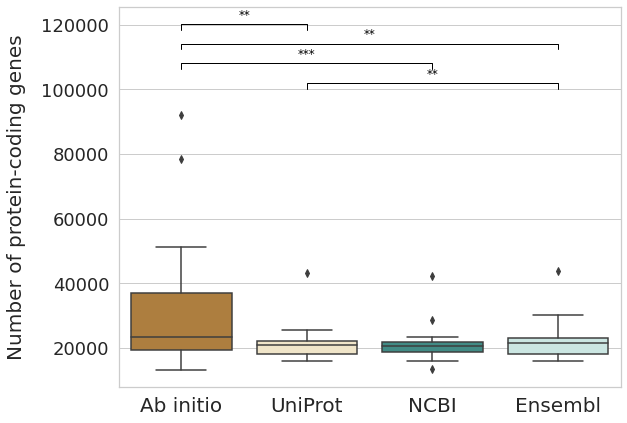

In [93]:
BrBGadapted= ['#BF812D', '#F6E8C3', '#35978F', '#C7EAE5']

sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(9,7))
fig = sns.boxplot(data=stats2, x='Method', y='count', palette=BrBGadapted)

# Pre-calculated p-values for pairwise comparisons
p_values = {
    ('Ab-initio', 'Reference proteomes UniProt'): 0.0014,  # Replace with your actual p-values
    ('Ab-initio', 'Ensembl'): 0.0021,
    ('Ab-initio', 'NCBI'): 0.0007,
    ('Reference proteomes UniProt', 'Ensembl'):0.0018
    # Add more pairs and their respective p-values here
}

# Set significance levels
alpha_levels = [0.05, 0.01, 0.001]

# Get the y-axis limits
bottom, top = ax.get_ylim()
y_range = top - bottom

# Significance bars
for i, ((method1, method2), p) in enumerate(p_values.items()):
    # Columns corresponding to the datasets of interest
    x1 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method1][0]
    x2 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method2][0]

    # What level is this bar among the bars above the plot?
    level = len(p_values) - i

    # Plot the bar
    bar_height = (y_range * 0.07 * level) + top
    bar_tips = bar_height - (y_range * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )

    # Significance level
    sig_symbol = ''
    for alpha_level in alpha_levels:
        if p < alpha_level:
            if alpha_level == 0.001:
                sig_symbol = '***'
            elif alpha_level == 0.01:
                sig_symbol = '**'
            elif alpha_level == 0.05:
                sig_symbol = '*'

    text_height = bar_height + (y_range * 0.01)
    plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')

    

method_labels = ['Ab initio', 'UniProt', 'NCBI', 'Ensembl']

# Set x-axis tick labels
#ax.set_xticks(range(len(method_labels)))
ax.set_xticklabels(method_labels)

ax.set_ylabel('Number of protein-coding genes', fontsize=20, labelpad=15)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=20)
#plt.show()
    
#plt.savefig('GenesNumberBoxplotStat.png',bbox_inches='tight', dpi=300)

## Could additionally do Bartlett;s test whatever...

In [12]:
description2=stats2.groupby(['Method']).describe()['count']

In [13]:
description2

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
Ab-initio,20.0,32268.90,20717.213252,13196.0,19258.25,23451.5,36897.50,91991.0
Ensembl,20.0,21835.65,6217.895102,16037.0,18110.25,21420.5,22999.00,43935.0
NCBI,20.0,21342.15,5840.170287,13627.0,18638.00,20698.5,21962.25,42405.0
Reference proteomes UniProt,20.0,21409.80,5769.453168,16021.0,18268.75,20881.0,22126.75,43230.0


In [51]:
#description2.to_csv("NumberofGenes_stats.csv")

Table for checking normality of difference between groups (paired t-test or willcoxon?)

In [15]:
abin=stats2[stats2["Method"]=='Ab-initio']
refp=stats2[stats2["Method"]=='Reference proteomes UniProt']
ncbi=stats2[stats2["Method"]=='NCBI']
ensembl=stats2[stats2["Method"]=='Ensembl']

abinc=list(abin['count'])
refpc=list(refp['count'])
ncbic=list(ncbi['count'])
ensemblc=list(ensembl['count'])

d = {'Species': abin['Species'], 'Ab-initio': abinc, 'RP-UP': refpc, 'Ensembl': ensemblc, 'NCBI': ncbic}
df= pd.DataFrame(data=d)
df['Ab-RP']= df['Ab-initio']- df['RP-UP']
df['Ab-Ens']= df['Ab-initio'] - df['Ensembl']
df['Ab-NCBI']=df['Ab-initio'] - df['NCBI']
df['RP-Ens']=df['RP-UP'] -df['Ensembl']
df['RP-NCBI']=df['RP-UP']- df['NCBI']
df['Ens-NCBI']=df['Ensembl']- df['NCBI']
df

,Species,Ab-initio,RP-UP,Ensembl,NCBI,Ab-RP,Ab-Ens,Ab-NCBI,RP-Ens,RP-NCBI,Ens-NCBI
8,CIOIN,13196.0,16680.0,16671.0,13627.0,-3484.0,-3475.0,-431.0,9.0,3053.0,3044.0
40,LEPOC,36227.0,18321.0,18341.0,18784.0,17906.0,17886.0,17443.0,-20.0,-463.0,-443.0
12,DANRE,23288.0,25707.0,30313.0,28638.0,-2419.0,-7025.0,-5350.0,-4606.0,-2931.0,1675.0
64,SALTR,51185.0,43230.0,43935.0,42405.0,7955.0,7250.0,8780.0,-705.0,825.0,1530.0
28,GADMO,38909.0,23383.0,23515.0,23485.0,15526.0,15394.0,15424.0,-132.0,-102.0,30.0
52,ORYLA,33024.0,23617.0,23622.0,22071.0,9407.0,9402.0,10953.0,-5.0,1546.0,1551.0
16,ECNAU,25404.0,21548.0,21655.0,21288.0,3856.0,3749.0,4116.0,-107.0,260.0,367.0
20,ERCAL,78579.0,22210.0,22329.0,22180.0,56369.0,56250.0,56399.0,-119.0,30.0,149.0
76,XENTR,40554.0,22099.0,22107.0,21826.0,18455.0,18447.0,18728.0,-8.0,273.0,281.0
4,CHPIB,91991.0,21164.0,21186.0,21090.0,70827.0,70805.0,70901.0,-22.0,74.0,96.0


In [43]:
pn1=shapiro(df['Ab-RP'])[1]
pn2=shapiro(df['Ab-Ens'])[1]
pn3=shapiro(df['Ab-NCBI'])[1]
pn4=shapiro(df['RP-Ens'])[1]
pn5=shapiro(df['RP-NCBI'])[1]
pn6=shapiro(df['Ens-NCBI'])[1]

None of the differences are normally distributed. However, let's correct for multiple testing

In [17]:
from scipy import stats

In [53]:
pvalues=[pn1, pn2,pn3,pn4,pn5,pn6]
print(pvalues)

In [54]:
stats.false_discovery_control(pvalues,method='bh')

array([4.00160134e-05, 4.00160134e-05, 4.00160134e-05, 1.72562445e-05,
       3.23984213e-02, 2.27718674e-02])

## Wilcoxon test for Figure 1

In [20]:
pv1=stats.wilcoxon(df['Ab-RP'], alternative="greater")[1]
st1=stats.wilcoxon(df['Ab-RP'], alternative="greater")[0]
print(stats.wilcoxon(df['Ab-RP'], alternative="greater"))
pv1

WilcoxonResult(statistic=182.0, pvalue=0.0013561248779296875)


0.0013561248779296875

In [21]:
pv2=stats.wilcoxon(df['Ab-Ens'],alternative="greater")[1]
st2=stats.wilcoxon(df['Ab-Ens'], alternative="greater")[0]
pv2

0.0021104812622070312

In [22]:
pv3=stats.wilcoxon(df['Ab-NCBI'],alternative="greater")[1]
st3=stats.wilcoxon(df['Ab-NCBI'], alternative="greater")[0]
pv3

0.0007162094116210938

In [23]:
pv4=stats.wilcoxon(df['RP-Ens'], alternative="less")[1]
st4=stats.wilcoxon(df['RP-Ens'], alternative="greater")[0]
pv4

0.001827239990234375

In [24]:
pv5=stats.wilcoxon(df['RP-NCBI'], alternative="greater")[1]
st5=stats.wilcoxon(df['RP-NCBI'], alternative="greater")[0]
pv5

0.3780832290649414

In [25]:
pv6=stats.wilcoxon(df['Ens-NCBI'], alternative="greater")[1]
st6=stats.wilcoxon(df['Ens-NCBI'], alternative="greater")[0]
pv6

0.08247852325439453

In [26]:
print(st1,st2,st3,st4,st5,st6)

182.0 179.0 186.0 30.0 114.0 143.0


In [14]:
#bartlett(abinc, refpc, ncbic, ensemblc)

BartlettResult(statistic=52.69721288429694, pvalue=2.1271499215093876e-11)

The p-value (2.1271499215093876e-11) from Bartlett’s test is less than α = .05, which means we can reject the null hypothesis that each group has the same variance. 

In [83]:
stats2

,Species,Method,count,mean,std,min,25%,50%,75%,max
8,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.0,418.0,717.0,33420.0
11,CIOIN,Reference proteomes UniProt,16680.0,322.028777,347.341120,21.0,144.0,236.0,415.0,21338.0
10,CIOIN,NCBI,13627.0,512.347912,520.487474,35.0,245.0,393.0,616.0,26404.0
9,CIOIN,Ensembl,16671.0,321.240957,346.229801,21.0,144.0,236.0,414.0,21338.0
40,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.0,226.0,429.0,22541.0
...,...,...,...,...,...,...,...,...,...,...
27,FELCA,Reference proteomes UniProt,19652.0,563.930389,554.057233,13.0,264.0,423.0,690.0,27108.0
59,PHOSI,Reference proteomes UniProt,18892.0,536.783242,509.399713,24.0,230.0,405.0,662.0,8798.0
58,PHOSI,NCBI,19069.0,563.881535,583.314773,35.0,259.0,421.0,683.0,34346.0
57,PHOSI,Ensembl,18962.0,522.826179,495.894731,24.0,224.0,395.0,643.0,8798.0


In [31]:
countdata=abin['count']
stats.shapiro(countdata)

ShapiroResult(statistic=0.762509822845459, pvalue=0.0002510276681277901)

In [74]:
abin=abin[abin['count']<50000]

In [72]:
abin

,Species,Method,count,mean,std,min,25%,50%,75%,max
8,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.00,418.0,717.0,33420.0
40,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.00,226.0,429.0,22541.0
12,DANRE,Ab-initio,23288.0,572.593653,656.834187,1.0,232.00,405.0,705.0,44005.0
64,SALTR,Ab-initio,51185.0,508.474553,560.288128,2.0,182.00,351.0,630.0,29370.0
28,GADMO,Ab-initio,38909.0,425.787093,474.394888,7.0,151.00,289.0,526.0,21989.0
52,ORYLA,Ab-initio,33024.0,453.040728,544.681967,66.0,157.00,298.0,558.0,33977.0
16,ECNAU,Ab-initio,25404.0,549.279523,601.809214,19.0,194.75,383.0,688.0,23170.0
76,XENTR,Ab-initio,40554.0,442.507052,542.063947,41.0,154.00,303.0,530.0,35366.0
0,CHICK,Ab-initio,18050.0,540.498837,611.956700,28.0,216.00,376.0,665.0,37618.0
36,KAKAP,Ab-initio,17022.0,551.134121,608.594017,49.0,216.00,389.0,672.0,32566.0


### Orthologs numbers

In [94]:
abin=statsmerge[statsmerge["Method"]=='Ab-initio']
refp=statsmerge[statsmerge["Method"]=='Reference proteomes UniProt']
ncbi=statsmerge[statsmerge["Method"]=='NCBI']
ensembl=statsmerge[statsmerge["Method"]=='Ensembl']
abin

,Species,Method,count,mean,std,min,25%,50%,75%,max,Orthologues_total,Relationships_total,Orthologs_norm,Relats_perOrth,Relats_perGene
0,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.00,418.0,717.0,33420.0,6547,100538,0.496135,15.356346,7.618824
4,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.00,226.0,429.0,22541.0,15308,179561,0.422558,11.729880,4.956552
8,DANRE,Ab-initio,23288.0,572.593653,656.834187,1.0,232.00,405.0,705.0,44005.0,19222,308132,0.825404,16.030174,13.231364
12,SALTR,Ab-initio,51185.0,508.474553,560.288128,2.0,182.00,351.0,630.0,29370.0,35429,463848,0.692175,13.092325,9.062186
17,GADMO,Ab-initio,38909.0,425.787093,474.394888,7.0,151.00,289.0,526.0,21989.0,21783,298865,0.559845,13.720103,7.681128
23,ORYLA,Ab-initio,33024.0,453.040728,544.681967,66.0,157.00,298.0,558.0,33977.0,19967,260107,0.604621,13.026844,7.876302
25,ECNAU,Ab-initio,25404.0,549.279523,601.809214,19.0,194.75,383.0,688.0,23170.0,18970,267270,0.746733,14.089088,10.520784
28,ERCAL,Ab-initio,78579.0,249.338347,257.867127,3.0,114.00,169.0,292.0,16208.0,17056,340778,0.217055,19.979948,4.336757
33,XENTR,Ab-initio,40554.0,442.507052,542.063947,41.0,154.00,303.0,530.0,35366.0,18439,367643,0.454678,19.938337,9.065518
38,CHPIB,Ab-initio,91991.0,293.629268,297.042868,5.0,140.00,211.0,341.0,21620.0,37691,547473,0.409725,14.525298,5.951376


In [28]:
abin=statsmerge[statsmerge["Method"]=='Ab-initio']
refp=statsmerge[statsmerge["Method"]=='Reference proteomes UniProt']
ncbi=statsmerge[statsmerge["Method"]=='NCBI']
ensembl=statsmerge[statsmerge["Method"]=='Ensembl']

abinc=list(abin['Orthologs_norm'])
refpc=list(refp['Orthologs_norm'])
ncbic=list(ncbi['Orthologs_norm'])
ensemblc=list(ensembl['Orthologs_norm'])

d = {'Species': abin['Species'], 'Ab-initio': abinc, 'RP-UP': refpc, 'Ensembl': ensemblc, 'NCBI': ncbic}
df= pd.DataFrame(data=d)
df['Ab-RP']= df['Ab-initio']- df['RP-UP']
df['Ab-Ens']= df['Ab-initio'] - df['Ensembl']
df['Ab-NCBI']=df['Ab-initio'] - df['NCBI']
df['RP-Ens']=df['RP-UP'] -df['Ensembl']
df['RP-NCBI']=df['RP-UP']- df['NCBI']
df['Ens-NCBI']=df['Ensembl']- df['NCBI']
df

,Species,Ab-initio,RP-UP,Ensembl,NCBI,Ab-RP,Ab-Ens,Ab-NCBI,RP-Ens,RP-NCBI,Ens-NCBI
0,CIOIN,0.496135,0.446763,0.447904,0.605709,0.049373,0.048232,-0.109574,-0.001141,-0.158947,-0.157806
4,LEPOC,0.422558,0.932154,0.933755,0.922807,-0.509597,-0.511197,-0.500249,-0.001601,0.009348,0.010948
8,DANRE,0.825404,0.902711,0.910896,0.903520,-0.077308,-0.085493,-0.078116,-0.008185,-0.000808,0.007377
12,SALTR,0.692175,0.903609,0.917537,0.914963,-0.211433,-0.225362,-0.222787,-0.013929,-0.011354,0.002574
17,GADMO,0.559845,0.910405,0.925112,0.936981,-0.350560,-0.365267,-0.377136,-0.014707,-0.026576,-0.011869
23,ORYLA,0.604621,0.930601,0.938024,0.960401,-0.325980,-0.333403,-0.355780,-0.007423,-0.029800,-0.022377
25,ECNAU,0.746733,0.954010,0.956407,0.983747,-0.207277,-0.209674,-0.237014,-0.002398,-0.029737,-0.027339
28,ERCAL,0.217055,0.903422,0.908729,0.909739,-0.686366,-0.691673,-0.692683,-0.005307,-0.006317,-0.001010
33,XENTR,0.454678,0.882031,0.908898,0.893247,-0.427353,-0.454220,-0.438569,-0.026867,-0.011216,0.015651
38,CHPIB,0.409725,0.890096,0.900642,0.932954,-0.480372,-0.490917,-0.523229,-0.010546,-0.042858,-0.032312


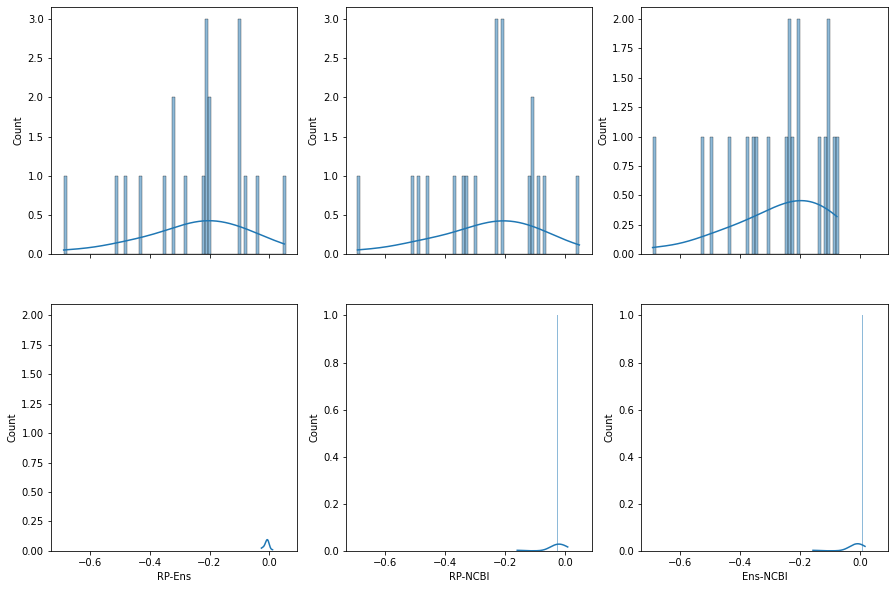

In [23]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2,3, figsize=(15,10), sharex=True)

fig = sns.histplot(data=df, x='Ab-RP', binwidth=0.01, kde=True, ax=ax1)
fig = sns.histplot(data=df, x='Ab-Ens', binwidth=0.01, kde=True, ax=ax2)
fig= sns.histplot(data=df, x='Ab-NCBI', binwidth=0.01, kde=True, ax=ax3)
fig= sns.histplot(data=df, x='RP-Ens', binwidth=0.01, kde=True, ax=ax4)
fig= sns.histplot(data=df, x='RP-NCBI', binwidth=0.01, kde=True, ax=ax5)
fig= sns.histplot(data=df, x='Ens-NCBI', binwidth=0.01, kde=True, ax=ax6)


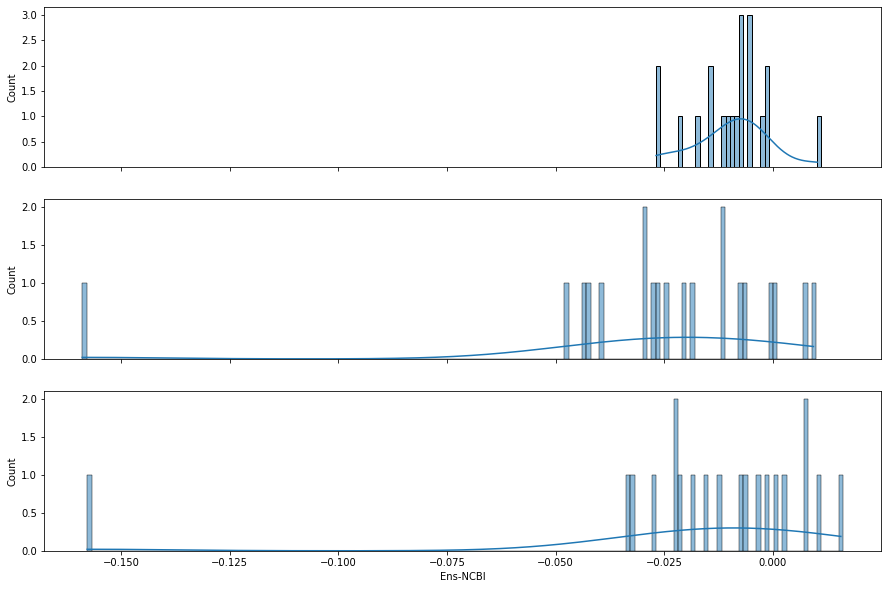

In [25]:
fig, (ax1, ax2, ax3)= plt.subplots(3, figsize=(15,10), sharex=True)

fig= sns.histplot(data=df, x='RP-Ens', binwidth=0.001, kde=True, ax=ax1)
fig= sns.histplot(data=df, x='RP-NCBI', binwidth=0.001, kde=True, ax=ax2)
fig= sns.histplot(data=df, x='Ens-NCBI', binwidth=0.001, kde=True, ax=ax3)

In [26]:
from scipy import stats
pn1=stats.shapiro(df['Ab-RP'])[1]
pn2=stats.shapiro(df['Ab-Ens'])[1]
pn3=stats.shapiro(df['Ab-NCBI'])[1]
pn4=stats.shapiro(df['RP-Ens'])[1]
pn5=stats.shapiro(df['RP-NCBI'])[1]
pn6=stats.shapiro(df['Ens-NCBI'])[1]
pvalues=[pn1, pn2,pn3,pn4,pn5,pn6]

print(pvalues)

[0.4919590353965759, 0.5041908025741577, 0.10526999831199646, 0.42551031708717346, 3.77934193238616e-05, 5.169707037566695e-06]


In [29]:
pv1=stats.wilcoxon(df['Ab-RP'], alternative= "less")[1]
pv2=stats.wilcoxon(df['Ab-Ens'], alternative="less")[1]
pv3=stats.wilcoxon(df['Ab-NCBI'], alternative="less")[1]
pv4=stats.wilcoxon(df['RP-Ens'], alternative="less")[1]
pv5=stats.wilcoxon(df['RP-NCBI'], alternative="less")[1]
pv6=stats.wilcoxon(df['Ens-NCBI'], alternative="less")[1]

st1=stats.wilcoxon(df['Ab-RP'], alternative="less")[0]
st2=stats.wilcoxon(df['Ab-Ens'], alternative="less")[0]
st3=stats.wilcoxon(df['Ab-NCBI'], alternative="less")[0]
st4=stats.wilcoxon(df['RP-Ens'], alternative="less")[0]
st5=stats.wilcoxon(df['RP-NCBI'], alternative="less")[0]
st6=stats.wilcoxon(df['Ens-NCBI'], alternative="less")[0]

pvals=[pv1, pv2,pv3,pv4,pv5,pv6]
sts=[st1,st2,st3,st4,st5,st6]
print(pvals)
print(sts)

[2.86102294921875e-06, 1.9073486328125e-06, 9.5367431640625e-07, 6.67572021484375e-05, 6.67572021484375e-05, 0.006808280944824219]
[2.0, 1.0, 0.0, 12.0, 12.0, 40.0]


### Figure 3

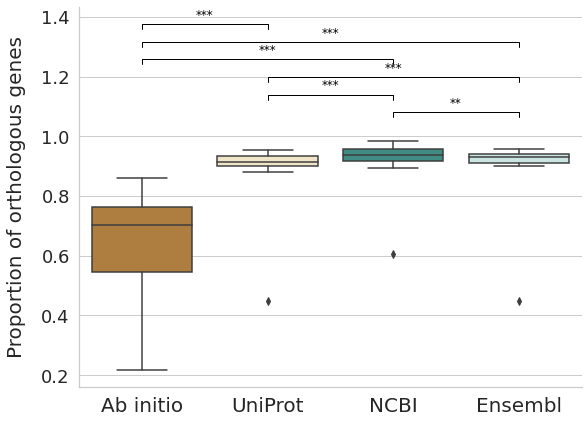

In [95]:
BrBGadapted= ['#BF812D', '#F6E8C3', '#35978F', '#C7EAE5']

sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(9,7))
fig = sns.boxplot(data=statsmerge, x='Method', y='Orthologs_norm', palette=BrBGadapted)

# Pre-calculated p-values for pairwise comparisons
p_values = {
    ('Ab-initio', 'Reference proteomes UniProt'): 0.000,  # Replace with your actual p-values
    ('Ab-initio', 'Ensembl'): 0.000,
    ('Ab-initio', 'NCBI'): 0.000,
    ('Reference proteomes UniProt', 'Ensembl'):0.000,
    ('Reference proteomes UniProt', 'NCBI'): 0.000,
    ('Ensembl', 'NCBI'): 0.007
    
    # Add more pairs and their respective p-values here
}

# Set significance levels
alpha_levels = [0.05, 0.01, 0.001]

# Get the y-axis limits
bottom, top = ax.get_ylim()
y_range = top - bottom

# Significance bars
for i, ((method1, method2), p) in enumerate(p_values.items()):
    # Columns corresponding to the datasets of interest
    x1 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method1][0]
    x2 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method2][0]

    # What level is this bar among the bars above the plot?
    level = len(p_values) - i

    # Plot the bar
    bar_height = (y_range * 0.07 * level) + top
    bar_tips = bar_height - (y_range * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )

    # Significance level
    sig_symbol = ''
    for alpha_level in alpha_levels:
        if p < alpha_level:
            if alpha_level == 0.001:
                sig_symbol = '***'
            elif alpha_level == 0.01:
                sig_symbol = '**'
            elif alpha_level == 0.05:
                sig_symbol = '*'

    text_height = bar_height + (y_range * 0.01)
    plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')


method_labels = ['Ab initio', 'UniProt', 'NCBI', 'Ensembl']

# Set x-axis tick labels
ax.set_xticklabels(method_labels)

ax.set_ylabel('Proportion of orthologous genes', fontsize=20, labelpad=15)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=20)
#plt.show()

sns.despine()
#plt.savefig('Orthologs_byMethod_stats.png',bbox_inches='tight', dpi=300)
#plt.show()
    

In [54]:
import statistics
from scipy import stats

def pos(lst):
    return [x for x in lst if x > 0] or None
def neg(lst):
    return[x for x in lst if x<0] or None

positivediff= statistics.mean(pos(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))
positivediffsem=stats.sem(pos(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))
negativediff= statistics.mean(neg(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))
negativediffsem=stats.sem(neg(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))

print(positivediff)
print(positivediffsem)

print(negativediff)
print(negativediffsem)

0.029789242645473238
0.006574533504614605
-0.006885884017786287
0.0016748204423209236


In [96]:
description3=statsmerge.groupby(['Method']).describe()['Orthologues_total']

In [56]:
description3

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
Ab-initio,20.0,18297.80,7048.106223,6547.0,14560.75,16994.5,19408.25,37691.0
Ensembl,20.0,19867.35,6245.523578,7467.0,16925.00,19555.5,21486.25,40312.0
NCBI,20.0,19755.40,5610.432833,8254.0,17422.50,19356.5,20670.50,38799.0
Reference proteomes UniProt,20.0,19262.20,5760.695788,7452.0,16940.50,19165.0,20616.50,39063.0


In [117]:
bartlett(list(abin['Orthologs_norm']), list(refp['Orthologs_norm']), 
         list(ncbi['Orthologs_norm']), list(ensembl['Orthologs_norm']))

BartlettResult(statistic=12.689875202657227, pvalue=0.005357604074879432)

## Figure 1

### Tree

In [38]:
import toytree
import toyplot

In [44]:
tre2=toytree.tree('species20tree.nwk')
tre3=toytree.tree('cladogram20species.nwk')

In [45]:
newlabels=['Homo sapiens','Mus musculus','Felis catus','Phocoena sinus','Sarcophilus harrisii ', 'Ornithorhynchus anatinus',
 'Strigops habroptila', 'Taeniopygia guttata','Gallus gallus','Chrysemys picta bellii','Podarcis muralis',
 'Xenopus tropicalis','Oryzias latipes','Echeneis naucrates','Gadus morhua', 'Salmo trutta','Danio rerio',
 'Lepisosteus oculatus', 'Erpetoichthys calabaricus','Ciona intestinalis']

In [46]:
tip_labels_estilo={
        "fill": "#262626",
        "font-size": "14px",
        "-toyplot-anchor-shift": "10px",
    }

In [47]:
# make the canvas and axes
canvas = toyplot.Canvas(width=1100, height=400)
axes = canvas.cartesian()
axes.show = False

# draw a rectangle (x1, x2, y1, y2)
axes.rectangle(
    -5.5, 0.35, -4.5, 21,
    opacity=0.25,
    color="darkred",
)

#draw a rectangle (x1, x2, y1, y2)
axes.rectangle(
    -8.5, -5.6, -2.5, 21,
    opacity=0.25,
    color="#1A8828",
)

axes.rectangle(
    -16.5, -11.5, -4.5, 21,
    opacity=0.25,
    color=toytree.colors[2],
)


# add tree to the axes
tre3.draw(layout='u',axes=axes,tip_labels=newlabels, tip_labels_style=tip_labels_estilo);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1100.0px" height="400.0px" viewBox="0 0 1100.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t770c715cd2fc4d908ad2045d602a0c5d"> Homo sapiens Mus musculus Felis catus Phocoena sinus Sarcophilus harrisii Ornithorhynchus anatinus Strigops habroptila Taeniopygia guttata Gallus gallus Chrysemys picta bellii Podarcis muralis Xenopus tropicalis Oryzias latipes Echeneis naucrates Gadus morhua Salmo trutta Danio rerio Lepisosteus oculatus Erpetoichthys calabaricus Ciona intestinalis

In [ ]:
import toyplot.svg
toyplot.svg.render(canvas, "tree-plot2-noname.svg")

#### Tree without labels for Figure 6

In [ ]:
# make the canvas and axes
canvas = toyplot.Canvas(width=700, height=180)
axes = canvas.cartesian()
axes.show = False

# draw a rectangle (x1, x2, y1, y2) - RED
axes.rectangle(
    -5.5, 0.35, -4.5, 7,
    opacity=0.25,
    color="darkred",
)

#draw a rectangle (x1, x2, y1, y2) - GREEN
axes.rectangle(
    -8.5, -5.6, -2.5, 7,
    opacity=0.25,
    color="#1A8828",
)

#BLUE
axes.rectangle(
    -16.5, -11.5, -4.5, 7,
    opacity=0.25,
    color=toytree.colors[2],
)
# add tree to the axes
tre3.draw(layout='u',axes=axes, tip_labels=False);

## Merged plots

In [105]:
especies=tre2.get_tip_labels()
especies.reverse()
especies

['CIOIN',
 'ERCAL',
 'LEPOC',
 'DANRE',
 'SALTR',
 'GADMO',
 'ECNAU',
 'ORYLA',
 'XENTR',
 'PODMU',
 'CHPIB',
 'CHICK',
 'TAEGU',
 'KAKAP',
 'ORANA',
 'SARHA',
 'PHOSI',
 'FELCA',
 'MOUSE',
 'HUMAN']

In [106]:
corrm=pd.DataFrame({'Me': ['Ab-initio', 'Reference proteomes UniProt', 'Ensembl', 'NCBI'],
                   'Method': ['Ab-initio', 'UniProt', 'Ensembl', 'NCBI']})

In [107]:
mes=['Ab-initio', 'Reference proteomes UniProt', 'Ensembl', 'NCBI']
methodsorder = CategoricalDtype(mes, ordered=True)
statsmerge['Method'] = statsmerge['Method'].astype(methodsorder)
statsmerge['Method']= statsmerge['Method'].map(corrm.set_index('Me')['Method'])

In [12]:
mypaleta=['#BF812D', '#E2D7A1',  '#A8DFD4', '#35978F'] #darker colours

In [13]:
stats2['Method'] = stats2['Method'].replace('Reference proteomes UniProt', 'UniProt')

### Figure 1

([], [])

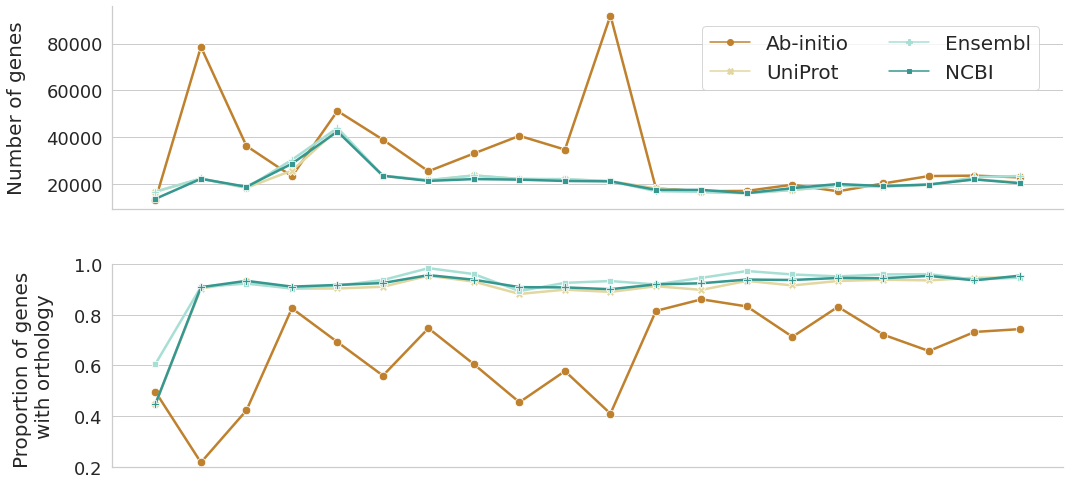

In [14]:
sns.set_context("notebook")
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16,8))

fig=sns.lineplot(data=stats2,x="Species", y="count", hue="Method",palette=mypaleta,hue_order=['Ab-initio', 'UniProt', 'Ensembl', 'NCBI'],
                  style="Method",linewidth=2.5, markersize=8.5, markers=True, dashes=False, ax=ax1)

fig=sns.lineplot(data=statsmerge,x="Species", y="Orthologs_norm", hue="Method",palette=mypaleta,
                  style="Method",linewidth=2.5, markersize=8.5, markers=True, dashes=False, ax=ax2)

ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax2.get_legend().remove()
ax1.set_ylabel('Number of genes', labelpad=20, size=20)
#ax1.set(ylabel='Number of genes')

ax2.set_ylabel('Proportion of genes \nwith orthology', labelpad=20, size=20)
ax2.set_ylim([0.2,1.0])
ax1.legend(bbox_to_anchor=(0.61, 0.95), ncol=2, fontsize=20)
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1.3))
sns.despine()
#plt.legend(bbox_to_anchor=(0.05, 0.85), loc='upper left', title= "Parameters species")

ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

plt.tight_layout(pad=4)
plt.xticks([],)
#plt.show()
#plt.savefig('TwoPlots2-lineplots.png',bbox_inches='tight', dpi=300)

## Tree extras

In [21]:
toyplot.html.render(canvas, "/tmp/tree-plot2.html")

In [49]:
tre3.draw(
    layout='u',
    width=980,
    height=250,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="980.0px" height="250.0px" viewBox="0 0 980.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tb9c3224c76674f38aec3d930048b840b"> HUMAN MOUSE FELCA PHOSI SARHA ORANA KAKAP TAEGU CHICK CHPIB PODMU XENTR ORYLA ECNAU GADMO SALTR DANRE LEPOC ERCAL CIOIN

In [50]:
tre2.draw(layout="u",tip_labels_align=True);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="360.0px" height="275.0px" viewBox="0 0 360.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tadcea9cac98c449088fea1031d8633d5"> HUMAN MOUSE FELCA PHOSI SARHA ORANA KAKAP TAEGU CHICK CHPIB PODMU XENTR ORYLA ECNAU GADMO SALTR DANRE LEPOC ERCAL CIOIN

In [ ]:
tre3.draw(ts='s', layout='u'); #With 's' ts --> cladogram, only found after adapting branch distances in tre3 (cladogram20species.nwk)

In [40]:
tre2.root(names='CIOIN')

In [44]:
styledict={"tip_labels_align": True, "layout": "u"}

In [66]:
tre2.features

{'dist', 'height', 'idx', 'name', 'support'}